<a href="https://colab.research.google.com/github/eedom/DataMining/blob/main/Project02_Spotify%20Song%20Tracks%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preamble**

Title: Spotify Song Tracks Classifier

Author: Edom Eshete

Email: eeshete@msudenver.edu

Last Update: 11/14/2021
```



# Introduction

The goal of this analysis is to develop classification models capable of predicting the genre of a song based on measured audio attributes. Addistionally, by using differnt classfication models and try to get best accuracy in predication from the data provided. The dataset for this project was provided by our professor which was obtained from Kaggle.  It consists of a collection of 42,305 song track from various musical genres. I will analyze the statistics symmary and visuals from each of the attributes of the dataset. There will be correclation anlysis between two genre types.The modeles that i will use are decision tree inference, naive Bayes classification, and artificial neural networks and additional K-Nearest Neigbors. 

# Dataset


* **Danceability**: *-float-* Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* **Acousticness:** *-float-*A measure from 0.0 to 1.0 of whether the track is acoustic.

* **Key** *-int-*  The key the track is in, integers map to pitches using standard Pitch Class notation.
* **Energy**: *-float-* Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.



* **Instrumentalness:** *-float-*Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
* **Liveness:** *-float-*Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

* **Loudness:** *-float-*The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.

* **Speechiness:** *-float-*Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
* **Tempo:** *-float-* The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

* **Valence:** *-float-*A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).*

* **Druration_ms** *-float-* The duration of the track in milliseconds













# **Preprocessing**


*   Importing the necessary python packages




In [ ]:
import numpy as np # statastics 
import pandas as pd # preprocessing 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import seaborn as sns

In [ ]:
data = pd.read_csv('genres_v2.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.



danceability  energy  ...  Unnamed: 0  title
0         0.831   0.814  ...         NaN    NaN
1         0.719   0.493  ...         NaN    NaN
2         0.850   0.893  ...         NaN    NaN
3         0.476   0.781  ...         NaN    NaN
4         0.798   0.624  ...         NaN    NaN

[5 rows x 22 columns]

In [ ]:
print(data.shape)
data.head()

(42305, 22)


danceability  energy  ...  Unnamed: 0  title
0         0.831   0.814  ...         NaN    NaN
1         0.719   0.493  ...         NaN    NaN
2         0.850   0.893  ...         NaN    NaN
3         0.476   0.781  ...         NaN    NaN
4         0.798   0.624  ...         NaN    NaN

[5 rows x 22 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

***Data Cleaning- drop unwanted columns attributes  ***

In [ ]:
data.drop(columns=['type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title'], inplace=True)
print(data.shape)
data.head()

(42305, 14)


danceability  energy  key  ...  duration_ms  time_signature      genre
0         0.831   0.814    2  ...       124539               4  Dark Trap
1         0.719   0.493    8  ...       224427               4  Dark Trap
2         0.850   0.893    5  ...        98821               4  Dark Trap
3         0.476   0.781    0  ...       123661               3  Dark Trap
4         0.798   0.624    2  ...       123298               4  Dark Trap

[5 rows x 14 columns]

**Attribut Encoding** 

*For this section we will transform some of categorical values into numeric lables and apply encoding on the values. So, that the attributes will be easily understood. 
Based on our data we will transform "Genre" attribute since we will use it for further data analysis.*

---


In [ ]:
genres = np.unique(data['genre'])
print(genres)

count = 0
for i in genres:
   count = count + 1
print("Counts : ", count )


['Dark Trap' 'Emo' 'Hiphop' 'Pop' 'Rap' 'RnB' 'Trap Metal'
 'Underground Rap' 'dnb' 'hardstyle' 'psytrance' 'techhouse' 'techno'
 'trance' 'trap']
Counts :  15


Based in our output we have 15 distinct music genres. 

Now we will map each category to a numeric valyes and genrate a lable encoding. I used sckit-learn pakage "LabelEncoder" for catagory transformation. 



In [ ]:
tran = LabelEncoder()
genre_labels = tran.fit_transform(data['genre'])
genre_mappings =  {index: label for index, label in enumerate(tran.classes_)}
genre_mappings


data['GenreLabel'] = genre_labels

data[['danceability','energy','key'	,	'loudness',	'mode',	'speechiness','acousticness',
      'instrumentalness','liveness','valence',	'tempo',	'duration_ms','time_signature','genre', 'GenreLabel']].iloc[1:7]

# genre_encoding = {'hardstyle' : 0,
#   'Emo' :1,
#   'Hiphop' : 2,
#  'Pop' :3,
#   'Rap' :4,
#  'RnB' :5,
#  'Trap Metal' :6,
#   'Underground Rap' :7,
#   'dnb' :8,
#  'Dark Trap' : 9,
# 'psytrance' : 10,
#  'techhouse' : 11,
# 'techno' : 12,
#  'trance': 13,
# 'trap': 14}

# genre_values =[]
# for genre in data['genre'].values:
#   genre_values.append(genre_encoding[genre])
# data['genre'] = genre_values


danceability  energy  key  ...  time_signature      genre  GenreLabel
1         0.719   0.493    8  ...               4  Dark Trap           0
2         0.850   0.893    5  ...               4  Dark Trap           0
3         0.476   0.781    0  ...               3  Dark Trap           0
4         0.798   0.624    2  ...               4  Dark Trap           0
5         0.721   0.568    0  ...               4  Dark Trap           0
6         0.718   0.668    8  ...               4  Dark Trap           0

[6 rows x 15 columns]

**Normalization**

In [ ]:
for attr in ['loudness', 'tempo','key','duration_ms']:
    data[attr] = (data[attr] - data[attr].min()) / (data[attr].max() - data[attr].min())


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  float64
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  duration_ms       42305 non-null  float64
 12  time_signature    42305 non-null  int64  
 13  genre             42305 non-null  object 
 14  GenreLabel        42305 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
data.describe()

danceability        energy  ...  time_signature    GenreLabel
count  42305.000000  42305.000000  ...    42305.000000  42305.000000
mean       0.639364      0.762516  ...        3.972580      7.295379
std        0.156617      0.183823  ...        0.268342      4.371303
min        0.065100      0.000243  ...        1.000000      0.000000
25%        0.524000      0.632000  ...        4.000000      4.000000
50%        0.646000      0.803000  ...        4.000000      7.000000
75%        0.766000      0.923000  ...        4.000000     11.000000
max        0.988000      1.000000  ...        5.000000     14.000000

[8 rows x 14 columns]

***Is there empty values***

In [ ]:
# To check it there is empty values
data.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
GenreLabel          0
dtype: int64

In [ ]:
data['genre'].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

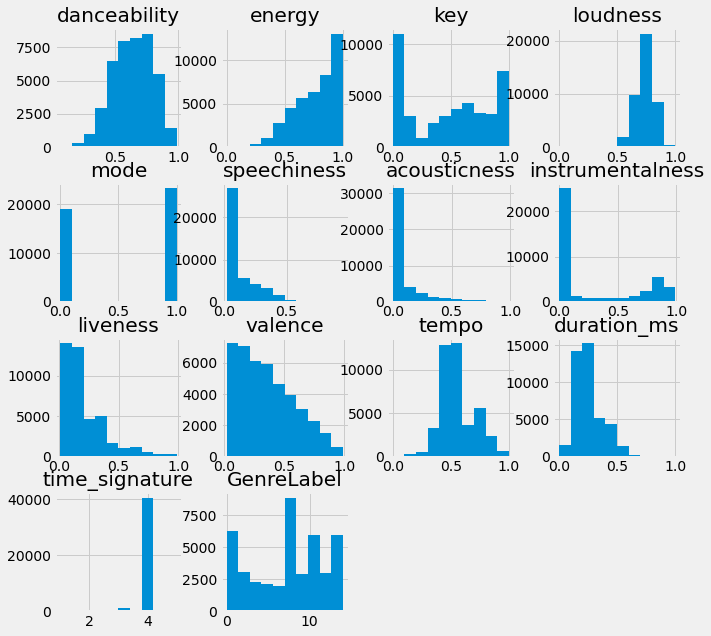

In [ ]:
histograms = data.hist(figsize=(10,10))
plt.show()

# **Summary** **Statistics**

For this Seaction we will analyz the summary statistics and visuals from each of the attributes of the dataset;
we were asked at minimum, a histogram and a multi box plot (per genre) should be produce per attribute. 


*   {'Dark Trap',  'Emo',  'Hiphop' ,  'Pop' ,  'Rap',  'RnB' , 'Trap Metal', 'Underground Rap',  'dnb', 'hardstyle' ,  'psytrance' , 'techhouse',  'techno' ,'trance', 'trap'}





# Danceability        

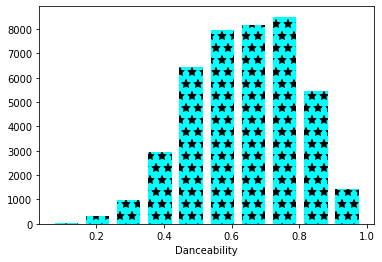

*** Summary Statistics ***
#Data_Records: 1
Range: [0.0651,0.988]
Mean: 0.64
Median: 0.65
std: 0.16


In [ ]:
dance =[]
for col in data:
  if col == 'danceability':
    dance.append(data[col])

    fig = px.box(data, 
          color = "genre",
          y = col, 
          title = col
        )
    fig.show()
    counts, bins, _ = plt.hist(dance, 
                           
                           rwidth=0.75,
                           histtype='bar',
                           linewidth=2,
                           facecolor='cyan',
                           hatch='*', 
                           fill=True
                           )
    plt.xlabel('Danceability')
    plt.show()


print('*** Summary Statistics ***')
print(f'#Data_Records: {len(dance)}')
print(f'Range: [{np.min(dance)},{np.max(dance)}]')
print('Mean: {:.2f}'.format(np.mean(dance)))
print('Median: {:.2f}'.format(np.median(dance)))
print('std: {:.2f}'.format(np.std(dance)))

# Energy

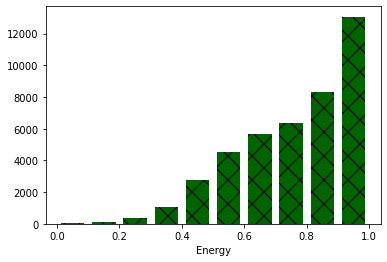

*** Summary Statistics ***
#Data_Records: 1
Range: [0.000243,1.0]
Mean: 0.76
Median: 0.80
std: 0.18


In [ ]:
energy =[]
for col in data:
  if col == 'energy':
    energy.append(data[col])

    fig = px.box(data, 
          color = "genre",
          y = col, 
          title = col
        )
    fig.show()
    counts, bins, _ = plt.hist(energy, 
                           
                           rwidth=0.75,
                           histtype='bar',
                           linewidth=2,
                           facecolor='darkgreen',
                           hatch='\\/', 
                           fill=True
                           )
    plt.xlabel('Energy')
    plt.show()


print('*** Summary Statistics ***')
print(f'#Data_Records: {len(energy)}')
print(f'Range: [{np.min(energy)},{np.max(energy)}]')
print('Mean: {:.2f}'.format(np.mean(energy)))
print('Median: {:.2f}'.format(np.median(energy)))
print('std: {:.2f}'.format(np.std(energy)))

# Key

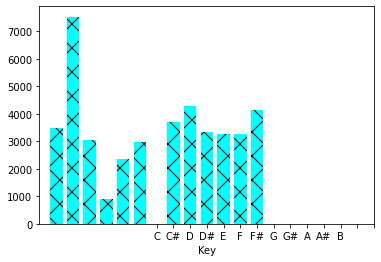

*** Summary Statistics ***
#Data_Records: 1
Range: [0.0,1.0]
Mean: 0.49
Median: 0.55
std: 0.33


In [ ]:
key =[]
for col in data:
  if col == 'key':
    key.append(data[col])

    fig = px.box(data, 
          color = "genre",
          y = col, 
          title = col
        )
    fig.show()
    
    _, bins, _ = plt.hist(key, 
                           bins=len(range(13)),
                           rwidth=.75,
                           histtype='bar',
                           linewidth=2,
                           facecolor='aqua',
                           hatch='\\/', 
                           fill=True
                           )
    ticks =[x + 0.5 for x in bins]
    axes = plt.gca()
    axes.set_xticks(ticks)
    axes.set_xticklabels(['C','C#', 'D','D#','E','F','F#','G','G#', 'A', 'A#', 'B'])

    plt.xlabel('Key')
    plt.show()


print('*** Summary Statistics ***')
print(f'#Data_Records: {len(key)}')
print(f'Range: [{np.min(key)},{np.max(key)}]')
print('Mean: {:.2f}'.format(np.mean(key)))
print('Median: {:.2f}'.format(np.median(key)))
print('std: {:.2f}'.format(np.std(key)))

# Loudness

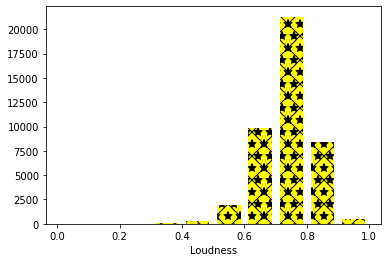

*** Summary Statistics ***
#Data_Records: 1
Range: [0.0,1.0]
Mean: 0.74
Median: 0.74
std: 0.08


In [ ]:
loudness =[]
for col in data:
  if col == 'loudness':
    loudness.append(data[col])

    fig = px.box(data, 
          color = "genre",
          y = col, 
          title = col
        )
    fig.show()
    counts, bins, _ = plt.hist(loudness, 
                           rwidth=0.75,
                           histtype='bar',
                           linewidth=2,
                           facecolor='yellow',
                           hatch='\*/', 
                           fill=True
                           )
    plt.xlabel('Loudness')
    plt.show()


print('*** Summary Statistics ***')
print(f'#Data_Records: {len(loudness)}')
print(f'Range: [{np.min(loudness)},{np.max(loudness)}]')
print('Mean: {:.2f}'.format(np.mean(loudness)))
print('Median: {:.2f}'.format(np.median(loudness)))
print('std: {:.2f}'.format(np.std(loudness)))

# Speechiness

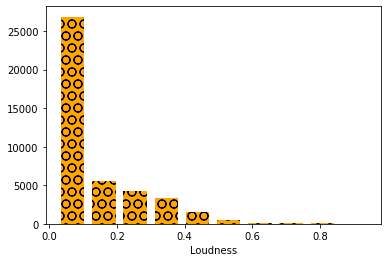

*** Summary Statistics ***
#Data_Records: 1
Range: [0.0227,0.946]
Mean: 0.14
Median: 0.08
std: 0.13


In [ ]:
speechiness =[]
for col in data:
  if col == 'speechiness':
    speechiness.append(data[col])

    fig = px.box(data, 
          color = "genre",
          y = col, 
          title = col
        )
    fig.show()
    counts, bins, _ = plt.hist(speechiness, 
                           rwidth=0.75,
                           histtype='bar',
                           linewidth=2,
                           facecolor='orange',
                           hatch='O', 
                           fill=True
                           )
    plt.xlabel('Loudness')
    plt.show()


print('*** Summary Statistics ***')
print(f'#Data_Records: {len(speechiness)}')
print(f'Range: [{np.min(speechiness)},{np.max(speechiness)}]')
print('Mean: {:.2f}'.format(np.mean(speechiness)))
print('Median: {:.2f}'.format(np.median(speechiness)))
print('std: {:.2f}'.format(np.std(speechiness)))

# Acousticness

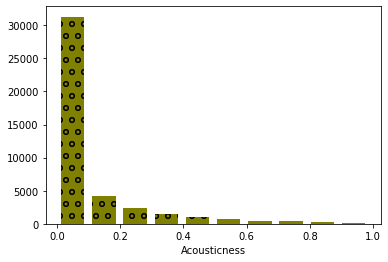

*** Summary Statistics ***
#Data_Records: 1
Range: [1.07e-06,0.988]
Mean: 0.10
Median: 0.02
std: 0.17


In [ ]:
acousticness =[]

for col in data:
  if col == 'acousticness':
    acousticness.append(data[col])

    fig = px.box(data, 
          color = "genre",
          y = col, 
          title = col
        )
    fig.show()
    counts, bins, _ = plt.hist(acousticness, 
                           rwidth=0.75,
                           histtype='bar',
                           linewidth=2,
                           facecolor='olive',
                           hatch='o', 
                           fill=True
                           )
    plt.xlabel('Acousticness')
    plt.show()


print('*** Summary Statistics ***')
print(f'#Data_Records: {len(acousticness)}')
print(f'Range: [{np.min(acousticness)},{np.max(acousticness)}]')
print('Mean: {:.2f}'.format(np.mean(acousticness)))
print('Median: {:.2f}'.format(np.median(acousticness)))
print('std: {:.2f}'.format(np.std(acousticness)))

# Instrumentalness

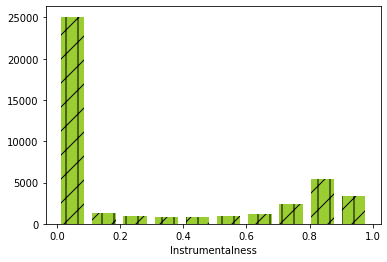

*** Summary Statistics ***
#Data_Records: 1
Range: [0.0,0.989]
Mean: 0.28
Median: 0.01
std: 0.37


In [ ]:
instrumentalness = []

for col in data:
  if col == 'instrumentalness':
    instrumentalness.append(data[col])

    fig = px.box(data, 
          color = "genre",
          y = col, 
          title = col
        )
    fig.show()
    counts, bins, _ = plt.hist(instrumentalness, 
                           rwidth=0.75,
                           histtype='bar',
                           linewidth=2,
                           facecolor='yellowgreen',
                           hatch='|/', 
                           fill=True
                           )
    plt.xlabel('Instrumentalness')
    plt.show()


print('*** Summary Statistics ***')
print(f'#Data_Records: {len(instrumentalness)}')
print(f'Range: [{np.min(instrumentalness)},{np.max(instrumentalness)}]')
print('Mean: {:.2f}'.format(np.mean(instrumentalness)))
print('Median: {:.2f}'.format(np.median(instrumentalness)))
print('std: {:.2f}'.format(np.std(instrumentalness)))

# Liveness

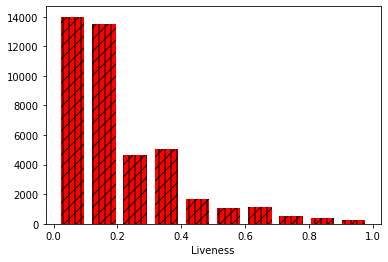

*** Summary Statistics ***
#Data_Records: 1
Range: [0.0107,0.988]
Mean: 0.21
Median: 0.14
std: 0.18


In [ ]:
liveness =[]

for col in data:
  if col == 'liveness':
    liveness.append(data[col])

    fig = px.box(data, 
          color = "genre",
          y = col, 
          title = col
        )
    fig.show()
    counts, bins, _ = plt.hist(liveness, 
                           rwidth=0.75,
                           histtype='bar',
                           linewidth=2,
                           facecolor='r',
                           hatch='|/|/', 
                           fill=True
                           )
    plt.xlabel('Liveness')
    plt.show()


print('*** Summary Statistics ***')
print(f'#Data_Records: {len(liveness)}')
print(f'Range: [{np.min(liveness)},{np.max(liveness)}]')
print('Mean: {:.2f}'.format(np.mean(liveness)))
print('Median: {:.2f}'.format(np.median(liveness)))
print('std: {:.2f}'.format(np.std(liveness)))

# Valence

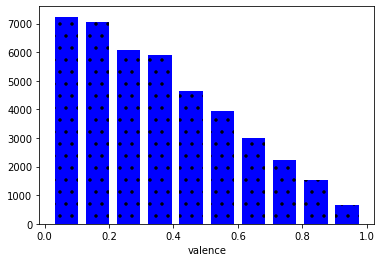

*** Summary Statistics ***
#Data_Records: 1
Range: [0.0187,0.988]
Mean: 0.36
Median: 0.32
std: 0.23


In [ ]:
valence = []

for col in data:
  if col == 'valence':
    valence.append(data[col])

    fig = px.box(data, 
          color = "genre",
          y = col, 
          title = col
        )
    fig.show()
    counts, bins, _ = plt.hist(valence, 
                           rwidth=0.75,
                           histtype='bar',
                           linewidth=2,
                           facecolor='b',
                           hatch='.', 
                           fill=True
                           )
    plt.xlabel('valence')
    plt.show()


print('*** Summary Statistics ***')
print(f'#Data_Records: {len(valence)}')
print(f'Range: [{np.min(valence)},{np.max(valence)}]')
print('Mean: {:.2f}'.format(np.mean(valence)))
print('Median: {:.2f}'.format(np.median(valence)))
print('std: {:.2f}'.format(np.std(valence)))

# Tempo

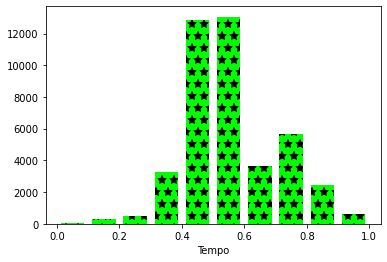

*** Summary Statistics ***
#Data_Records: 1
Range: [0.0,1.0]
Mean: 0.55
Median: 0.54
std: 0.15


In [ ]:
tempo =[]

for col in data:
  if col == 'tempo':
    tempo.append(data[col])

    fig = px.box(data, 
          color = "genre",
          y = col, 
          title = col
        )
    fig.show()
    counts, bins, _ = plt.hist(tempo, 
                           rwidth=0.75,
                           histtype='bar',
                           linewidth=2,
                           facecolor='lime',
                           hatch='*', 
                           fill=True
                           )
    plt.xlabel('Tempo')
    plt.show()


print('*** Summary Statistics ***')
print(f'#Data_Records: {len(tempo)}')
print(f'Range: [{np.min(tempo)},{np.max(tempo)}]')
print('Mean: {:.2f}'.format(np.mean(tempo)))
print('Median: {:.2f}'.format(np.median(tempo)))
print('std: {:.2f}'.format(np.std(tempo)))

# Duration_ms

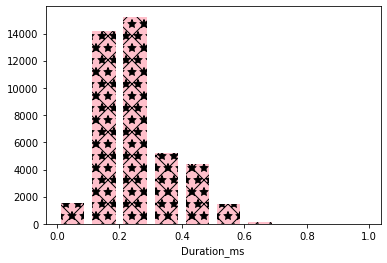

*** Summary Statistics ***
#Data_Records: 1
Range: [0.0,1.0]
Mean: 0.25
Median: 0.22
std: 0.12


In [ ]:
duration_ms = []

for col in data:
  if col == 'duration_ms':
    duration_ms.append(data[col])

    fig = px.box(data, 
          color = "genre",
          y = col, 
          title = col,
          
        )
    fig.show()
    counts, bins, _ = plt.hist(duration_ms, 
                           rwidth=0.75,
                           histtype='bar',
                           linewidth=2,
                           facecolor='pink',
                           hatch='\*/', 
                           fill=True
                           )
    plt.xlabel('Duration_ms')
    plt.show()


print('*** Summary Statistics ***')
print(f'#Data_Records: {len(duration_ms)}')
print(f'Range: [{np.min(duration_ms)},{np.max(duration_ms)}]')
print('Mean: {:.2f}'.format(np.mean(duration_ms)))
print('Median: {:.2f}'.format(np.median(duration_ms)))
print('std: {:.2f}'.format(np.std(duration_ms)))

# **Correlation** **Analysis**

we were asked to analyze the correlation between two genres and i choose energy and loudeness because, when  i listen to loud music i feel very energetic so I want to see the correlation between them. 


*   The scatter plot can show evidence of a Positive linear relation and This showes a strong positive relationship between loudness and energy: for every pair of point in the plot the one with the larger energy vaue also has the larger loudness value and small value energy also has small value of loudness. 



energy: mean=0.763 stdv=0.184
loudness: mean=0.737 stdv=0.081
coefficient [[1.         0.60153995]
 [0.60153995 1.        ]]


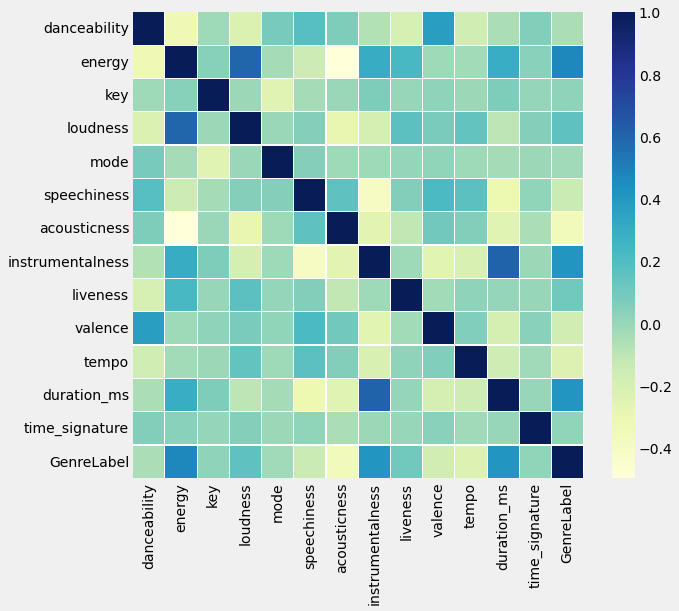

In [ ]:
energy_val = []
loud_val = []

for item in data:
  if item == 'energy':
    energy_val.append(data[item])
  if item == 'loudness':
    loud_val.append(data[item])

# summarize
print('energy: mean=%.3f stdv=%.3f' % (np.mean(energy_val), np.std(energy_val)))
print('loudness: mean=%.3f stdv=%.3f' % (np.mean(loud_val), np.std(loud_val)))
# # plot
# computing the corrlation matrix
corrmat = data.corr()

f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

C = np.corrcoef(energy_val,loud_val)
print("coefficient" , C)


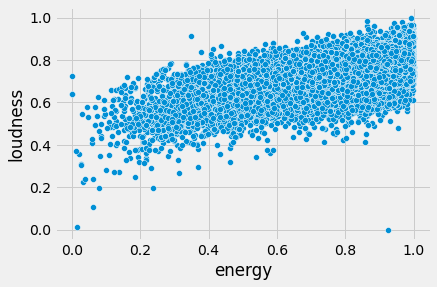

In [ ]:
sns.scatterplot(x="energy", y="loudness", data=data);

# **Classification**

# Part one - Decision Trees

In [ ]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: ID3 algorithm (for decision trees)

import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# #df = pd.DataFrame(data, columns=['danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms'])

df = pd.read_csv('genres_v2.csv',sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
df.drop(columns=['type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title'], inplace=True)

X = df.iloc[:,0:-2].values
Y = df.iloc[:,-1].values
print(df.head())
print(Y.shape)

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(max_depth=12).fit(X_test, y_test)
y_pred =model.predict(X_test )
accuracy= accuracy_score(y_test, y_pred)
print('Accuracy:' , accuracy)

# print(export_text(model, feature_names=list(df.columns[:-2])))



          danceability              energy  ... time_signature      genre
0                0.831  0.8140000000000001  ...              4  Dark Trap
1   0.7190000000000001               0.493  ...              4  Dark Trap
2                 0.85               0.893  ...              4  Dark Trap
3  0.47600000000000003  0.7809999999999999  ...              3  Dark Trap
4   0.7979999999999999               0.624  ...              4  Dark Trap

[5 rows x 14 columns]
(42305,)
Accuracy: 0.7902997069112224


# Part two - Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB 
 
model = GaussianNB().fit(X_train, y_train)
y_pred = model.predict(X_test )
accuracy= accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.49825092181147773


# Part three- ANN

In [ ]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description:  ANN for genre

from sklearn.neural_network import MLPClassifier 
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame
import random, os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# TODO: normalize attribute values first  
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(df.iloc[:,:-1].values)
Y = df.iloc[:,-1].values
# TODO: train a multilayer ANN to implement classifier
clf = MLPClassifier(hidden_layer_sizes=(100,25), max_iter=3000, random_state=0)
clf.fit(X, Y)

# TODO: compute the accuracy of the classifier
print('Accuracy:', clf.score(X, Y))

Accuracy: 0.6840326202576528


# Additional Classfication modle 

# KNN 

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('genres_v2.csv',sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
df.drop(columns=['type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title'], inplace=True)
df.head()

danceability              energy  ... time_signature      genre
0                0.831  0.8140000000000001  ...              4  Dark Trap
1   0.7190000000000001               0.493  ...              4  Dark Trap
2                 0.85               0.893  ...              4  Dark Trap
3  0.47600000000000003  0.7809999999999999  ...              3  Dark Trap
4   0.7979999999999999               0.624  ...              4  Dark Trap

[5 rows x 14 columns]

In [ ]:
#Replace zeroes
zero_not_accepted =['danceability','energy','key'	,	'loudness',	'mode',	'speechiness','acousticness',
      'instrumentalness','liveness','valence',	'tempo',	'duration_ms','time_signature']
# if there is a NaN replace it with zero and if the data doesn't exits we replace it with the mean value
for col in range(len(zero_not_accepted),-1):
  df[col] = df[col].replace(0, np.NaN)
  mean = int(df[col].mean(skipna=True))
  df[col] = df[col].replace(np.NaN, mean)


In [ ]:
#split dataset
X = df.iloc[:,0:-2].values
Y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)


In [ ]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [ ]:
#Define the model 
classifer = KNeighborsClassifier(n_neighbors=91)
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)

#Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print(cm)
# print(f1_score(y_test, y_pred,average='weighted'))
print('Accuracy: ' , accuracy_score(y_test, y_pred))

[[322  15  13   0   0  10   9 354  35  57   3  23  18  82  29]
 [ 14 180   1   0   1  27   0  27  16  50   0  10   1  11   3]
 [ 35  16 200   0  10  42   2 265   6  11   2  13   0   7  12]
 [  4  19   7   1   0  17   1  24   3   6   0  15   0   1   0]
 [ 14   5   9   0  70   5   1 219   0   4   1   8   0   2   3]
 [ 22  26  63   0   5  94   0 144   6   8   0  21   0   5   2]
 [ 32  10   5   0   0   1  23 189  11  40   0   9   0   9  55]
 [ 78   9  76   0   3  20  10 905   9  22   0  21   1   9  29]
 [  1  12   8   0   0   0   0   5 510  28   6   1   1   0  27]
 [  6  15   1   0   0   2   0   0   2 482  26   2   1  31  51]
 [  0   0   0   0   0   0   0   1   0   3 514   7  63   9   1]
 [  9   0   0   0   0   1   2  19   0   1   9 441  65  17   4]
 [  4   0   0   0   0   0   0   3   0   0  61  44 468  10   0]
 [ 15   6   0   0   0   0   0   5   0  64  92  11  29 332   8]
 [ 11   4   1   0   0   4   0  18  11 117   0  10   1  17 388]]
Accuracy:  0.5826734428554544
